## Imports

In [1]:
import sys
import os
from typing import List

sys.path.append(os.path.abspath(".."))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from epml_da.config import PROCESSED_DATA_DIR, RAW_DATA_DIR, INTERIM_DATA_DIR

2025-12-01 01:20:16.546 | INFO     | epml_da.config:<module>:11 - PROJ_ROOT path is: /Users/vasilisa/Documents/itmo-epml-da/epml-da-wine-quality


## Processing

In [6]:
df_original = pd.read_csv(f"{RAW_DATA_DIR}/WineQT.csv")

In [7]:
df = df_original.copy()

### Creating binary target

In [8]:
def create_binary_target(
    data: pd.DataFrame,
    target_col: str,
    good_wine_threshold: int = 6,
) -> pd.DataFrame:
    """Creates a binary target column (1/0) based on threshold.
    
    If value > threshold = 1 (good wine)
    Else = 0 (bad wine).
    """
    data = data.copy()
    binary_target_col = f"{target_col}_binary"

    data[binary_target_col] = np.where(
        data[target_col] > good_wine_threshold,
        1,
        0
    )

    return data

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [10]:
df = create_binary_target(df, "quality")

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id', 'quality_binary'],
      dtype='object')

### Removing unused columns

In [12]:
def remove_unused_columns(
    data: pd.DataFrame,
    unused_cols: List[str],
) -> pd.DataFrame:
    """Removes columns from df"""
    data = data.copy()
    data = data.drop(columns=unused_cols).copy()
    return data

In [13]:
df = remove_unused_columns(df, ["Id", "quality"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality_binary        1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


<Axes: ylabel='Frequency'>

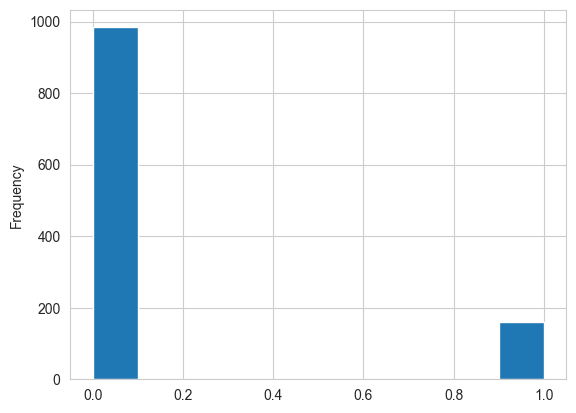

In [15]:
df["quality_binary"].plot(kind="hist")

### Conclusions

1. Data is imbalanced after binary target is introduced. We deciced that from 7 to 10 the quality is good, and we got around 200 occurences of such wine in our data, while we have around 1000 samples for bad wine.

2. We shall use something like F1 score for metrics of prediction quality.
